Dataset:  https://www.kaggle.com/lodetomasi1995/income-classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('income_evaluation.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.shape

(32561, 15)

#### Feature description:

- age: continuous<br />
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked<br />
- fnlwgt: continuous<br />
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool<br />
- education-num: continuous<br />
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse<br />
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces<br />
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried<br />
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black<br />
- sex: Female, Male<br />
- capital-gain: continuous<br />
- capital-loss: continuous<br />
- hours-per-week: continuous<br />
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

- TARGET: income: >50K, <=50K

### Preprocessing

In [5]:
data.rename(columns=lambda x: x.strip(), inplace=True)

In [6]:
data_obj = data.select_dtypes(['object'])
data[data_obj.columns] = data_obj.apply(lambda x: x.str.strip())

**Просмотр пустых значений:**

In [7]:
cat_features_possible_values = {
    'workclass': {'Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov','Local-gov', 'State-gov', 'Without-pay', 'Never-worked'},
    'education':{'Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool'},
    'marital-status': {'Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'},
    'occupation': {'Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces'},
    'relationship': {'Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'},
    'race': {'White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'},
    'sex': {'Female', 'Male'},
    'native-country': {'United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands'},
    'income': {'>50K', '<=50K'}
}

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Вывод:** Пустых значений нет

**НЕкорректные значения:**

In [9]:
for column in data.columns:
    if data[column].dtype != np.int64:
        unique_values = set(data[column].unique())
        non_valid_values = unique_values.difference(cat_features_possible_values[column])
        if non_valid_values:
            for non_valid_value in non_valid_values:
                print(column, ' -  ', non_valid_values, len(data[data[column]==non_valid_value]))

workclass  -   {'?'} 1836
occupation  -   {'?'} 1843
native-country  -   {'?'} 583


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def count_plot(data, column):
    plt.figure(figsize=(20, 10))
    sns.countplot(x=column, data=data)

- `workclass`

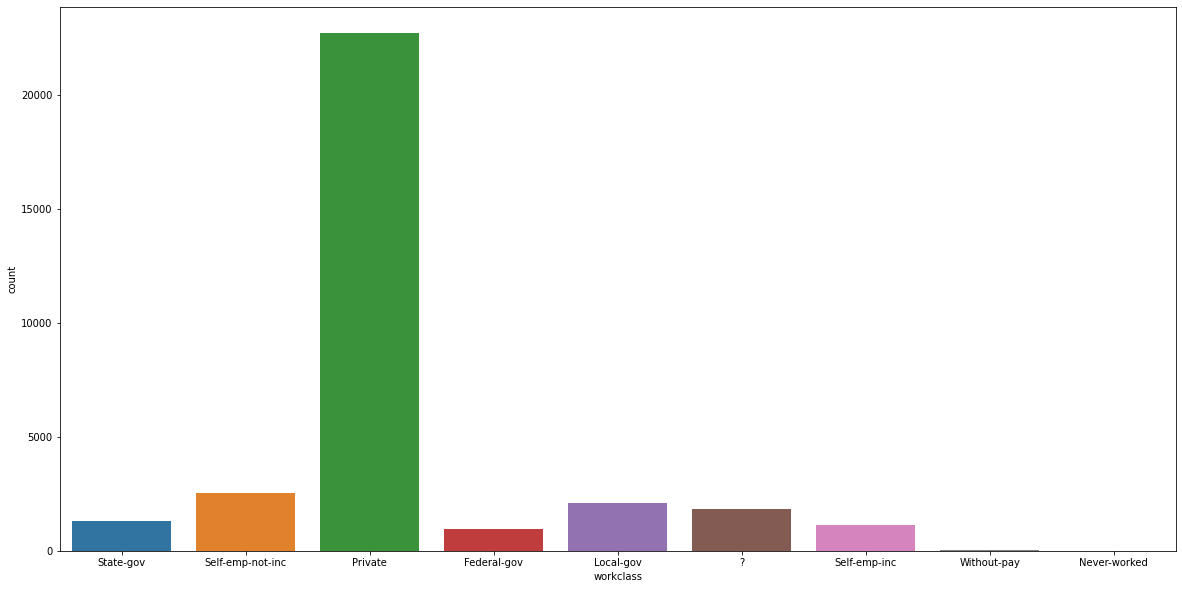

In [12]:
count_plot(data, 'workclass')

заменяем на `private`, т.к. это значение значительно превосходит остальные по кол-ву

In [13]:
data.workclass.replace('?', 'Private', inplace=True)

- `occupation`:

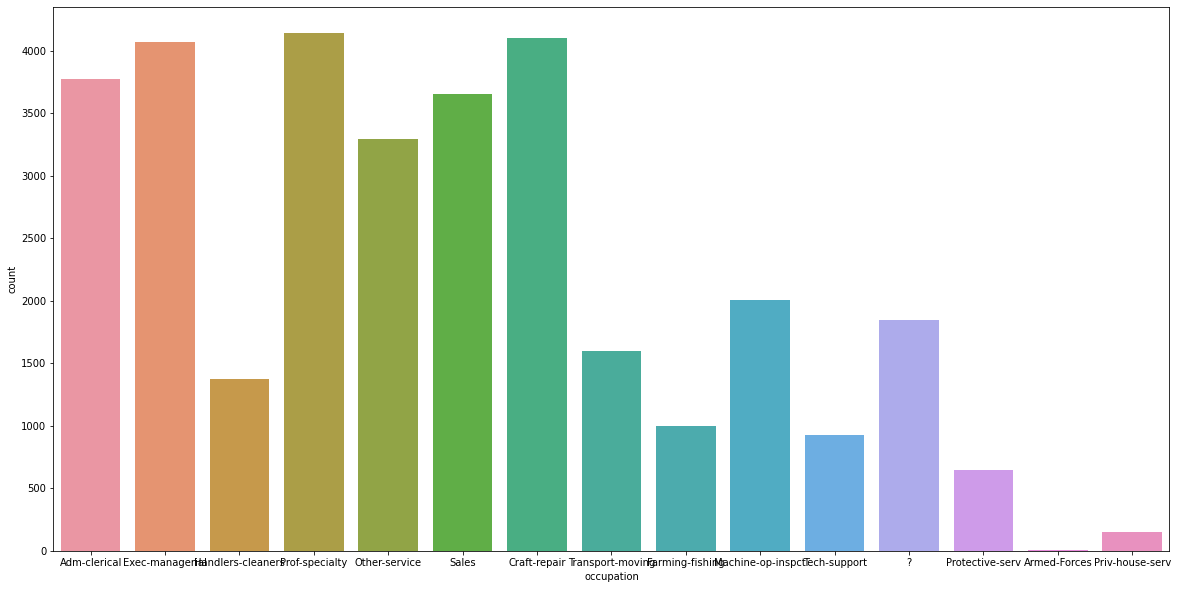

In [14]:
count_plot(data, "occupation")

Вынесем `?` в отдельный класс, т.к. слишком много данных, чтобы их удалять, и нет преобладающего класса среди представленных, чтобы заменить значения. 

In [15]:
data.occupation.replace('?', 'Unknown', inplace=True)

- `native-country`

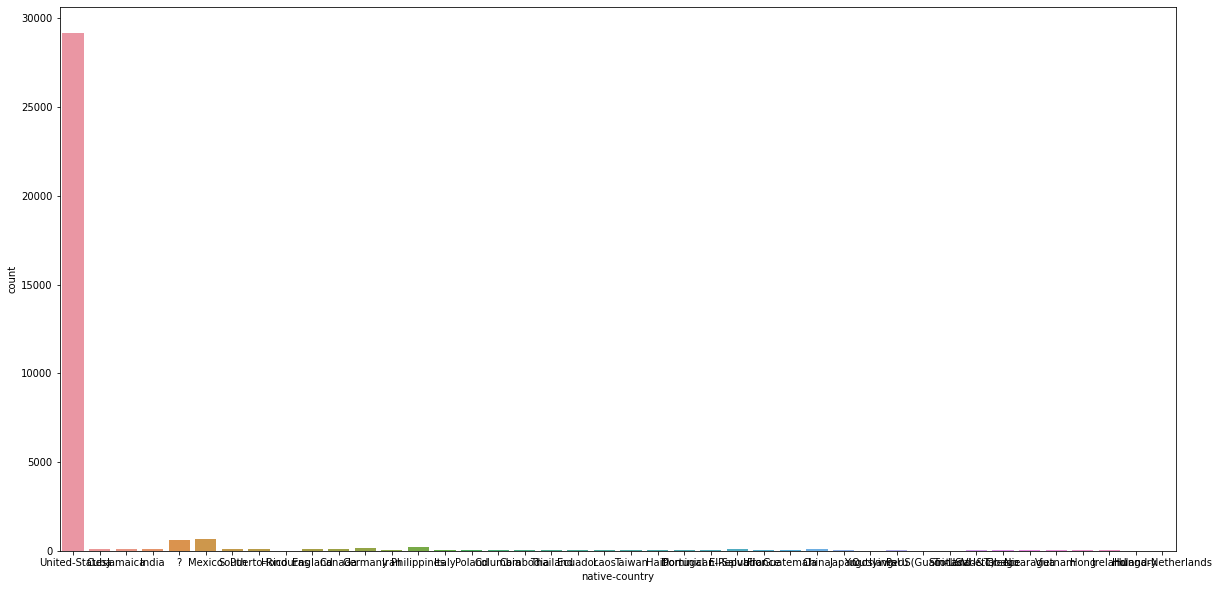

In [16]:
count_plot(data, "native-country")

In [17]:
data['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [18]:
data['native-country'].replace('?', 'United-States', inplace=True)

Проверка:

In [19]:
for column in data.columns:
    if data[column].dtype != np.int64:
        unique_values = set(data[column].unique())
        non_valid_values = unique_values.difference(cat_features_possible_values[column])
        if non_valid_values:
            for non_valid_value in non_valid_values:
                print(column, ' -  ', non_valid_values, len(data[data[column]==non_valid_value]))

occupation  -   {'Unknown'} 1843


**Дубликаты:**

In [20]:
duplicated_data = data[data.duplicated(keep=False)]
duplicated_data.sort_values(by=data.columns.to_list())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
17673,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
6990,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
15189,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K
21490,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
31993,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K


In [21]:
duplicated_data.shape

(47, 15)

дупликатов 24 строчки. Мы их удаляем потому что данные сгрупированы, признак `fnlwgt` показывает кол-во людей.

In [22]:
data.drop_duplicates(inplace=True)
data.shape

(32537, 15)

- Удаление столбца `fnlwgt`

In [23]:
data.drop('fnlwgt', axis=1, inplace=True)

In [24]:
data.shape

(32537, 14)

Не влияет на вновь пришедшего

**Обработка категориальных значений:**

Категориальные поля:

In [25]:
cat_features_possible_values.keys()

dict_keys(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income'])

Обработка:

`education`

In [26]:
data[['education', 'education-num']].drop_duplicates().sort_values(by='education-num')

,education,education-num
224,Preschool,1
160,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
77,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10


`education-num` - это то же самое что и `education` только в числовом формате и упорядочены так: чем выше степень образования - 
тем цифра больше.  
Поэтому мы удаляем столбец `education`:

In [27]:
data.drop('education', axis=1, inplace=True)

- Замена на булевые:

`sex`

In [28]:
sex_replace_dict = {
    'Female': False, 
    'Male': True
}

In [29]:
data.sex = data.sex.map(sex_replace_dict)

In [30]:
data.sex

0         True
1         True
2         True
3         True
4        False
         ...  
32556    False
32557     True
32558    False
32559     True
32560    False
Name: sex, Length: 32537, dtype: bool

`income`

In [31]:
income_replace_dict = {
    '<=50K': False, 
    '>50K': True
}

In [32]:
data.income = data.income.map(income_replace_dict)

In [33]:
data.income

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557     True
32558    False
32559    False
32560     True
Name: income, Length: 32537, dtype: bool

In [34]:
data.rename(columns={'sex': 'is-male',
                     'income': 'is-more-than-50K'}, inplace=True)

- One-hot encoding:

In [35]:
one_hot_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

In [36]:
data = pd.get_dummies(data, prefix=one_hot_columns, columns=one_hot_columns, drop_first=True)

In [37]:
data.columns

Index(['age', 'education-num', 'is-male', 'capital-gain', 'capital-loss',
       'hours-per-week', 'is-more-than-50K', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'occupation_Unknown',
       'relationship_N

In [38]:
data.head()

,age,education-num,is-male,capital-gain,capital-loss,hours-per-week,is-more-than-50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,True,2174,0,40,False,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,True,0,0,13,False,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,True,0,0,40,False,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,True,0,0,40,False,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,False,0,0,40,False,0,0,1,...,0,0,0,0,0,0,0,0,0,0


- **Нормализация**

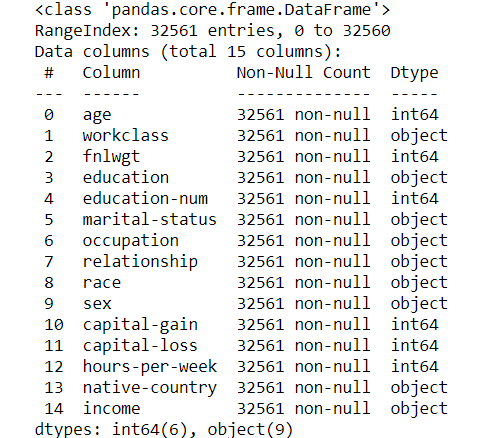

In [39]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
count,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,...,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,10.081815,1078.443741,87.368227,40.440329,0.064327,0.000215,0.753266,0.034299,0.078065,...,0.001137,0.003504,0.000369,0.002459,0.001567,0.000553,0.000584,0.913883,0.002059,0.000492
std,13.637984,2.571633,7387.957424,403.101833,12.346889,0.245338,0.014666,0.431117,0.182000,0.268278,...,0.033703,0.059089,0.019201,0.049525,0.039561,0.023514,0.024158,0.280542,0.045332,0.022170
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
data_scaled = scaler.fit_transform(data)
normilized_data = pd.DataFrame(data_scaled, columns=data.columns)

In [43]:
normilized_data.head()

,age,education-num,is-male,capital-gain,capital-loss,hours-per-week,is-more-than-50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.301370,0.800000,1.0,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.800000,1.0,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.533333,1.0,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.400000,1.0,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.800000,0.0,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


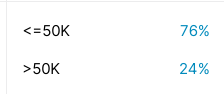

### Model Training

In [44]:
SEED = 42

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = normilized_data.drop('is-more-than-50K', axis=1)
y = normilized_data['is-more-than-50K']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [48]:
X_train

,age,education-num,is-male,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
1216,0.424658,0.600000,1.0,0.076881,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27941,0.191781,0.800000,1.0,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23063,0.452055,1.000000,1.0,0.150242,0.0,0.500000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19670,0.068493,0.533333,1.0,0.000000,0.0,0.448980,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19172,0.150685,0.533333,0.0,0.000000,0.0,0.448980,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,0.287671,0.933333,0.0,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5390,0.630137,0.800000,0.0,0.000000,0.0,0.244898,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,0.013699,0.400000,0.0,0.000000,0.0,0.193878,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15795,0.232877,0.666667,1.0,0.000000,0.0,0.500000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Дерево решений

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [50]:
decision_tree_classifier = DecisionTreeClassifier(random_state=SEED)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
predicted = decision_tree_classifier.predict(X_test)
accuracy_score(y_test, predicted)

0.8145871747592707

Подбор лучших параметров:

In [52]:
def get_best_model(model, X_train, y_train, parameters, scoring='f1'):
    clf = GridSearchCV(model, parameters, scoring='f1')
    clf.fit(X_train, y_train)
    return clf.best_estimator_

In [53]:
parameters = {'criterion': ('gini', 'entropy'),
              'max_depth': [*range(3,7)]}

In [54]:
model = DecisionTreeClassifier(random_state=SEED)
decision_tree_classifier = get_best_model(model, X_train, y_train, parameters)
decision_tree_classifier

DecisionTreeClassifier(max_depth=6, random_state=42)

In [55]:
decision_tree_predicted = decision_tree_classifier.predict(X_test)
accuracy_score(y_test, decision_tree_predicted)

0.8549477566072526

In [56]:
from sklearn.metrics import plot_confusion_matrix, f1_score

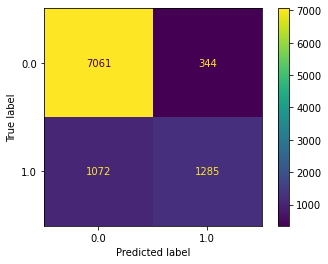

In [57]:
plot_confusion_matrix(decision_tree_classifier, X_test, y_test)

In [58]:
f1_score(y_test, decision_tree_predicted)

0.6447566482689412

Плохо предсказываются единички, наверное, потому что выборка не сбалансирована

**Попробуем удалить избыточные данные со значение 1 в `y_train`**:

In [59]:
def delete_some_data(X_data, y_data, frac):
    delete_index = y_data[y_train==0].sample(frac=frac, random_state=SEED).index
    
    y_filtered = y_data.drop(index=delete_index)
    X_filtered = X_data.drop(index=delete_index)
    
    return (X_filtered, y_filtered)

In [60]:
y_train.value_counts()

0.0    17293
1.0     5482
Name: is-more-than-50K, dtype: int64

In [61]:
X_train_filtered, y_train_filtered = delete_some_data(X_train, y_train, 0.33)

снова обучаем

In [62]:
model = DecisionTreeClassifier(random_state=SEED)
another_decision_tree_classifier = get_best_model(model, X_train_filtered, y_train_filtered, parameters)
another_decision_tree_classifier

DecisionTreeClassifier(max_depth=6, random_state=42)

In [63]:
predicted_values = another_decision_tree_classifier.predict(X_test)
accuracy_score(y_test, predicted_values)

0.8537185003073141

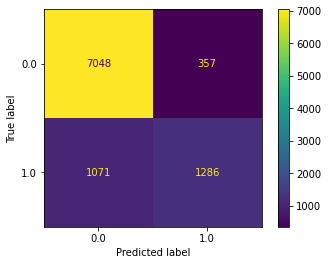

In [64]:
plot_confusion_matrix(another_decision_tree_classifier, X_test, y_test)

In [65]:
f1_score(y_test, predicted_values)

0.643

**Вывод:** Единички стали предсказываться чуть лучше, нолики хуже, в целом точность упала

### Random Forest 

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
parameters = {'n_estimators': [*range(8, 15)],
              'criterion': ('gini', 'entropy'),
              'max_depth': [*range(3, 10)]}

In [68]:
model = RandomForestClassifier(random_state=SEED)
random_forest_classifier = get_best_model(model, X_train, y_train, parameters)
random_forest_classifier

RandomForestClassifier(max_depth=9, n_estimators=13, random_state=42)

In [69]:
random_forest_predicted = random_forest_classifier.predict(X_test)
accuracy_score(y_test, random_forest_predicted)

0.8533087482073346

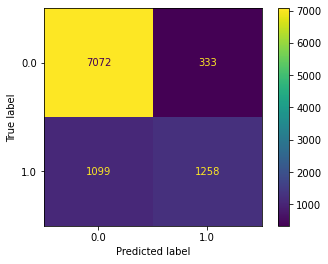

In [70]:
plot_confusion_matrix(random_forest_classifier, X_test, y_test)

In [71]:
f1_score(y_test, random_forest_predicted)

0.6372847011144884

F1-score у каждого дерева и леса в целом:

<AxesSubplot:>

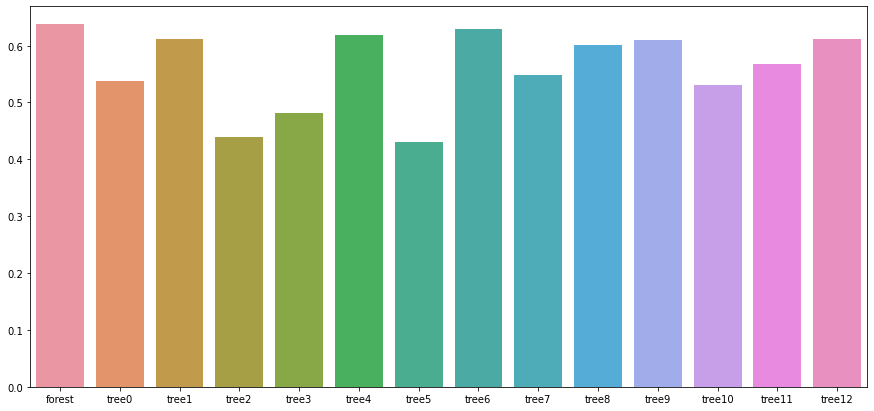

In [72]:
f1_scores = []
for tree in [random_forest_classifier,  *random_forest_classifier.estimators_]:
    y_pred = tree.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))
    
labels = ['forest'] + ['tree'+str(i) for i in range(random_forest_classifier.n_estimators)]
fig, axs = plt.subplots(figsize=(15, 7))
sns.barplot(x=labels, y=f1_scores,ax=axs)

### KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
parameters = {'n_neighbors': [*range(7, 14)]}

In [75]:
model = KNeighborsClassifier()
knn_classifier = get_best_model(model, X_train, y_train, parameters)
knn_classifier

KNeighborsClassifier(n_neighbors=13)

In [76]:
knn_predicted = knn_classifier.predict(X_test)
accuracy_score(y_test, knn_predicted)

0.8318992009834051

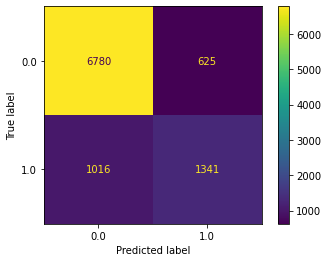

In [77]:
plot_confusion_matrix(knn_classifier, X_test, y_test)

In [78]:
f1_score(y_test, knn_predicted)

0.6204024982650937

С удалением части данных:

In [79]:
another_knn_classifier = KNeighborsClassifier(n_neighbors=13)
another_knn_classifier.fit(X_train_filtered, y_train_filtered)

KNeighborsClassifier(n_neighbors=13)

In [80]:
predicted_values = another_knn_classifier.predict(X_test)
accuracy_score(y_test, predicted_values)

0.8207334562589633

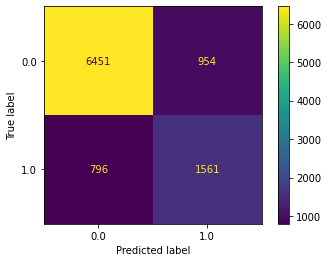

In [81]:
plot_confusion_matrix(another_knn_classifier, X_test, y_test)

In [82]:
f1_score(y_test, predicted_values)

0.6408045977011494

### CatBoost

In [83]:
from catboost import CatBoostClassifier

In [84]:
cat_boost_classifier = CatBoostClassifier(iterations=2,
                                          depth=2,
                                          learning_rate=1,
                                          loss_function='Logloss',
                                          verbose=True)
cat_boost_classifier.fit(X_train, y_train)

0:	learn: 0.4020525	total: 280ms	remaining: 280ms
1:	learn: 0.3563634	total: 290ms	remaining: 0us


In [85]:
cat_boost_predicted = cat_boost_classifier.predict(X_test)
accuracy_score(y_test, cat_boost_predicted)

0.8429625076828519

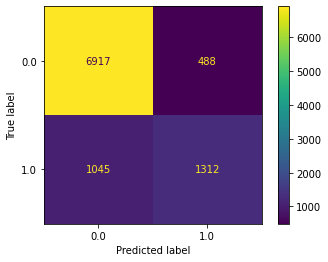

In [86]:
plot_confusion_matrix(cat_boost_classifier, X_test, y_test)

In [87]:
f1_score(y_test, cat_boost_predicted)

0.6312244407024297

### AdaBoost

In [88]:
from sklearn.ensemble import AdaBoostClassifier

In [89]:
params = {
    'base_estimator': [DecisionTreeClassifier(random_state=SEED), RandomForestClassifier(max_depth=6, n_estimators=13)],
    'n_estimators': [*range(10, 40)]    
}

In [90]:
model = AdaBoostClassifier(random_state=SEED)
ada_boost_classifier = get_best_model(model, X_train, y_train, params)

In [91]:
ada_boost_predicted = ada_boost_classifier.predict(X_test)
accuracy_score(y_test, ada_boost_predicted)

0.8692890801065355

In [92]:
f1_score(y_test, ada_boost_predicted)

0.7046296296296295

In [93]:
ada_boost_classifier

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=6,
                                                         n_estimators=13),
                   n_estimators=38, random_state=42)

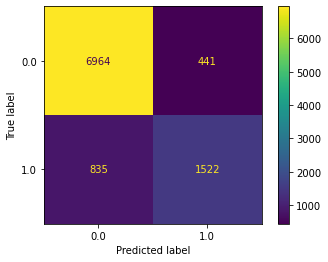

In [94]:
plot_confusion_matrix(ada_boost_classifier, X_test, y_test)

### Сравнение моделей

In [95]:
models = [decision_tree_classifier, random_forest_classifier, knn_classifier, cat_boost_classifier, ada_boost_classifier]

Text(0.5, 1.0, 'F-score')

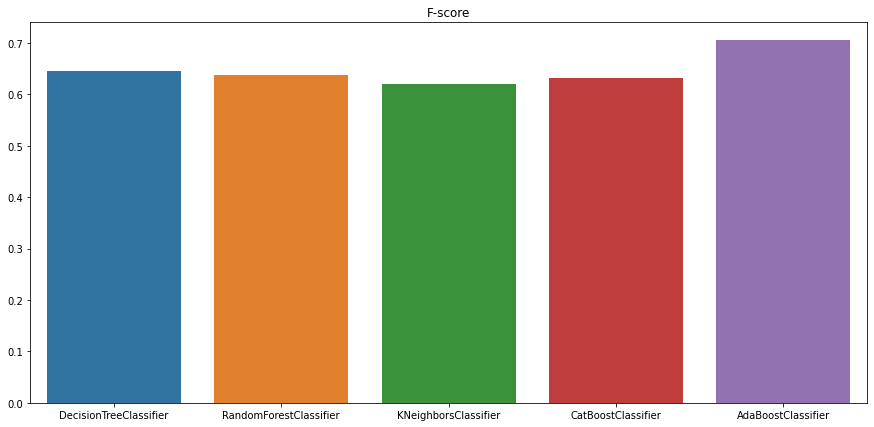

In [96]:
f1_scores = []
for model in models:
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))
labels = [type(model).__name__ for model in models]

fig, axs = plt.subplots(figsize=(15, 7))
sns.barplot(x=labels, y=f1_scores,ax=axs)
axs.set_title('F-score')

**Вывод:** Лучшее значение `F-score`имеет `AdaBoostClassifier`